# <img src="https://i.ibb.co/BNnGDwC/Hand-pointer-clicking-pallete-white.png" width="20" height="20"> PALETTE Source Code
> Created by Ahmed Muharram and Kidus Seyoum for ESE 3600 at the University of Pennsylvania

## Step 0: Data Preprocessing, Part I

In [ ]:
# Imports

# Dependencies
import numpy as np
import matplotlib.pylab as plt
import pathlib
import random
import sys
import os
import math
import re
import gdown
import cv2
from google.colab.patches import cv2_imshow
from datetime import datetime

# I/O
from google.colab import files
import shutil
import json

# Tensorflow + ML
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split

In [ ]:
# Create necessary folders
!rm -r /content/raw_data
!rm -r /content/datasets/extracted_data
!rm -r /content/datasets/hand_data
!rm -r /content/datasets/processed_data

if not os.path.exists('/content/raw_data'):
  os.makedirs('/content/raw_data')

if not os.path.exists('/content/datasets/extracted_data'):
  os.makedirs('/content/datasets/extracted_data')

if not os.path.exists('/content/datasets/hand_data'):
  os.makedirs('/content/datasets/hand_data')

if not os.path.exists('/content/datasets/processed_data'):
  os.makedirs('/content/datasets/processed_data')

rm: cannot remove '/content/raw_data': No such file or directory
rm: cannot remove '/content/datasets/extracted_data': No such file or directory
rm: cannot remove '/content/datasets/hand_data': No such file or directory
rm: cannot remove '/content/datasets/processed_data': No such file or directory


In [ ]:
# Download the raw images
raw_data_url = 'https://drive.google.com/uc?export=download&id=1FmDziQ5UukRJwcD5rxiPvu1xsdOKFyjr'

gdown.download(raw_data_url, '/content/raw_data.zip', quiet=False)
!unzip -q raw_data.zip -d /content/raw_data

if os.path.exists('/content/raw_data/masterdata'):
  print("Moving masterdata to raw_data")
  for file in os.listdir('/content/raw_data/masterdata'):
    shutil.move(os.path.join('/content/raw_data/masterdata', file), '/content/raw_data')
  !rm -r /content/raw_data/masterdata

# masterdata contains a folder for our augmented data.
# We will also utilize that
if os.path.exists('/content/raw_data/augmented_data_labeled'):
  print("Moving augmented_data_labeled to raw_data")
  for file in os.listdir('/content/raw_data/augmented_data_labeled'):
    shutil.move(os.path.join('/content/raw_data/augmented_data_labeled', file), '/content/raw_data')
  !rm -r /content/raw_data/augmented_data_labeled


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1FmDziQ5UukRJwcD5rxiPvu1xsdOKFyjr
From (redirected): https://drive.google.com/uc?export=download&id=1FmDziQ5UukRJwcD5rxiPvu1xsdOKFyjr&confirm=t&uuid=894522e3-55d7-4822-9875-5b94a40754a5
To: /content/raw_data.zip
100%|██████████| 1.48G/1.48G [00:18<00:00, 80.2MB/s]


Moving masterdata to raw_data
Moving augmented_data_labeled to raw_data


In [ ]:
# The code snippet used for augmentation
### DO NOT RERUN! ###
# -----------------------------------------------------------------------------

# INPUT_DIR = '/content/datasets/processed_data'
# OUTPUT_DIR = '/content/datasets/augmented_data'

# if not os.path.exists(OUTPUT_DIR):
#     os.makedirs(OUTPUT_DIR)

# ImageGen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1.0 / 255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# for file in os.listdir(INPUT_DIR):
#     image_path = os.path.join(INPUT_DIR, file)

#     if not os.path.exists(image_path):
#         print(f"File not found: {image_path}")
#         continue

#     if not (file.lower().endswith(('.jpg', '.jpeg', '.png'))):
#         print(f"Invalid file format: {image_path}")
#         continue

#     image = cv2.imread(image_path)

#     if image is None:
#         print(f"Unable to read image: {image_path}")
#         continue

#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image, (224, 224))  # Resize to 224x224
#     image = np.expand_dims(image, axis=0)  # Add batch dimension

#     aug_iter = ImageGen.flow(image, batch_size=1)

#     for i in range(5):
#         aug_image = next(aug_iter)[0]
#         aug_image = (aug_image * 255).astype(np.uint8)

#         # Save augmented image
#         save_path = os.path.join(OUTPUT_DIR, f"{os.path.splitext(file)[0]}_aug_{i}.jpg")
#         cv2.imwrite(save_path, cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))

In [ ]:
# Code for labeler.py - the Python script we used to label our data
### DO NOT UNCOMMENT ##
# -----------------------------------------------------------------------------

# import tkinter as tk
# from tkinter import filedialog
# from PIL import Image, ImageTk
# import os
# import json

# class ImageCoordinateSelector:
#     def __init__(self):
#         self.root = tk.Tk()
#         self.root.title("Image Coordinate Selector")

#         self.image_label = tk.Label(self.root)
#         self.image_label.pack()

#         self.coordinates = []
#         self.image_files = []
#         self.current_image_index = 0
#         self.current_image = None
#         self.current_image_original = None
#         self.output_file = "coordinates.json"

#         self.image_label.bind("<Button-1>", self.save_coordinate)
#         self.setup_ui()

#     def setup_ui(self):
#         tk.Button(self.root, text="Load Images", command=self.load_images).pack()
#         tk.Button(self.root, text="Skip and Delete", command=self.skip_and_delete).pack()
#         tk.Button(self.root, text="Save and Exit", command=self.save_and_exit).pack()

#     def load_images(self):
#         folder_path = filedialog.askdirectory(title="Select Image Folder")
#         if not folder_path:
#             return

#         self.image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp'))]
#         if not self.image_files:
#             print("No images found in the selected folder.")
#             return

#         self.display_image()

#     def display_image(self):
#         if self.current_image_index < len(self.image_files):
#             image_path = self.image_files[self.current_image_index]
#             self.current_image_original = Image.open(image_path)

#             # Scale image to fit within the display window
#             self.current_image = self.current_image_original.copy()
#             display_width = 800
#             display_height = 800
#             self.current_image.thumbnail((display_width, display_height))

#             img_tk = ImageTk.PhotoImage(self.current_image)
#             self.image_label.config(image=img_tk)
#             self.image_label.image = img_tk

#             self.root.title(f"Image {self.current_image_index + 1}/{len(self.image_files)} - Click to select coordinate")
#         else:
#             print("All images processed.")
#             self.image_label.config(image=None)
#             self.root.title("All images processed")

#     def save_coordinate(self, event):
#         if self.current_image_original:
#             image_path = self.image_files[self.current_image_index]
#             file_name = os.path.splitext(os.path.basename(image_path))[0]

#             # Scale coordinates back to original resolution
#             original_width, original_height = self.current_image_original.size
#             display_width, display_height = self.current_image.size

#             x_scaled = int(event.x * (original_width / display_width))
#             y_scaled = int(event.y * (original_height / display_height))

#             x_normalized = round(x_scaled / original_width, 6)
#             y_normalized = round(y_scaled / original_height, 6)

#             self.coordinates.append({
#                 "file": file_name,
#                 "x": str(x_normalized),
#                 "y": str(y_normalized)
#             })
#             print(f"Saved coordinate for {file_name}: (xscaled: {x_scaled}, xnorm: {x_normalized}, yscaled: {y_scaled}, ynorm: {y_normalized})")

#             self.current_image_index += 1
#             self.display_image()

#     def skip_and_delete(self):
#         if self.current_image_index < len(self.image_files):
#             image_path = self.image_files[self.current_image_index]
#             try:
#                 os.remove(image_path)
#                 print(f"Deleted image: {image_path}")
#             except Exception as e:
#                 print(f"Error deleting image: {e}")

#             self.image_files.pop(self.current_image_index)
#             self.display_image()
#         else:
#             print("No more images to skip and delete.")

#     def save_and_exit(self):
#         with open(self.output_file, "w") as f:
#             json.dump(self.coordinates, f, indent=4)
#         print(f"Coordinates saved to {self.output_file}")
#         self.root.destroy()

#     def run(self):
#         self.root.mainloop()

# if __name__ == "__main__":
#     app = ImageCoordinateSelector()
#     app.run()

Raw data size (before preprocessing): 6181
Here are 3 random images for reference:


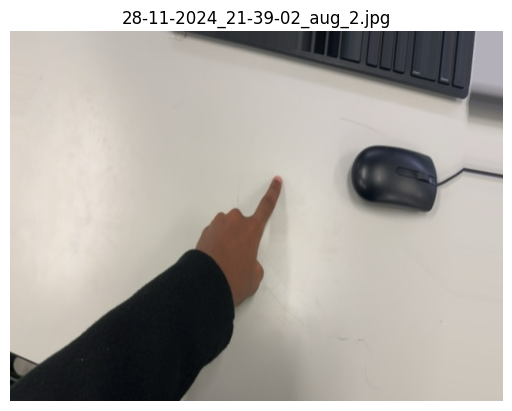

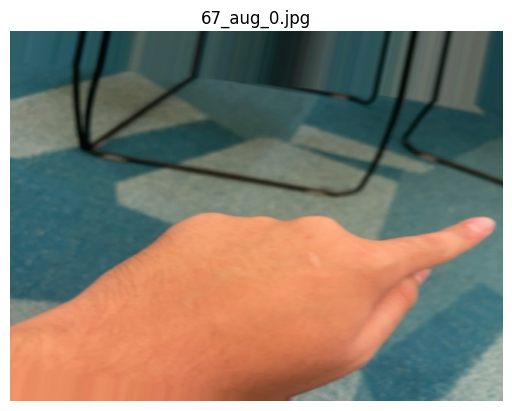

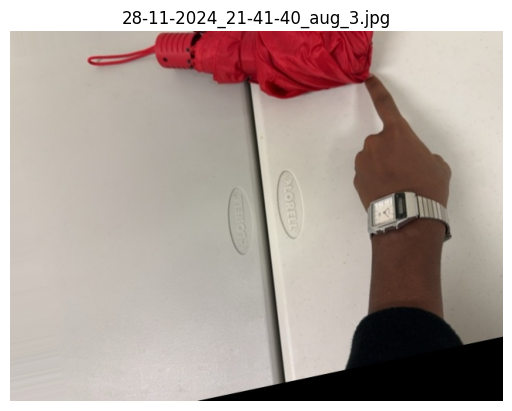

In [ ]:
print("Raw data size (before preprocessing):", len(os.listdir('/content/raw_data')))
print("Here are 3 random images for reference:")
for i in range(3):
  image_path = np.random.choice(os.listdir('/content/raw_data'))
  image = cv2.imread(os.path.join('/content/raw_data', image_path))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.axis('off')
  plt.title(image_path)
  plt.show()

In [ ]:
!rm -r /content/datasets/extracted_data

if not os.path.exists('/content/datasets/extracted_data'):
  os.makedirs('/content/datasets/extracted_data')

In [ ]:
INPUT_DIR = '/content/raw_data/'
OUTPUT_DIR = '/content/datasets/extracted_data'

image_files = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

for idx, file in enumerate(image_files):
  image = cv2.imread(os.path.join(INPUT_DIR, file))

  if image is None:
    print(f"Unable to read file: {file}")
    continue

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  height, width, _ = image.shape

  # Images need to have an aspect ratio of 4:3
  if abs((width / height) - (4 / 3)) > 0.01:
        print(f"Skipping image with non-4:3 aspect ratio: {file}")
        continue

  # Resize every file to 640 x 480
  resized_image = cv2.resize(image, (640, 480))
  resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

  # Convert to png for unification
  output_path = os.path.join(OUTPUT_DIR, file.rsplit('.', 1)[0] + '.png')
  cv2.imwrite(output_path, resized_image)

!rm -r /content/raw_data
!rm -r /content/raw_data.zip

### Step 0.1: Palm Detection and Hand Extraction (LEGACY CODE - READ!)

**Before you start compiling, please read the following!**

This is legacy code for when our model was 50 megabytes. This model alone was around 17 megabytes. Now, we just use the CNN below. However, the steps will assume that we also use this model to show our approach.

One of these preprocessing steps is to extract hands using [MediaPipe's Palm Detection model](https://github.com/aashish2000/hand_tracking/tree/master). The point of the model is to figure out the bounding boxes around palms/hands. Originally, the program takes in a live video feed and draws a bounding box around the detected hand:

![image.gif](https://github.com/aashish2000/hand_tracking/blob/master/res.gif?raw=true)

We have modified the script to instead take the directory of extracted images and do predictions on all of them. Then, it would black out the entire image except the region of the bounding box of the hand to make it easier for our implemented model to detect the x, y coordinates of the fingertip. This method has been significantly more effective than transfer learning as it will be shown later in this notebook.

However, this also meant that we have to download the processed hand data, remove the faulty predictions manually, and label them. So, **RERUNNING THE NEXT FEW CELLS WILL NOT YIELD THE SAME RESULTS**! The first model will output images that do not have hands in them and then the second one will hallucinate.

#### Palm Detection Model
A modified version of [the MediaPipe Hand Landmarker](https://ai.google.dev/edge/mediapipe/solutions/vision/hand_landmarker/python), based on [aashish2000's hand_tracking repository on GitHub](https://github.com/aashish2000/hand_tracking/tree/master).

In [ ]:
# !rm -r /content/palm_detection
# model_url = 'https://drive.google.com/uc?export=download&id=1zqxk35q4YgFlDUHLEgzN5hZ26_9cIwM0'
# gdown.download(model_url, '/content/hand_tracking.zip', quiet=False)
# !unzip -q hand_tracking.zip -d /content/hand_tracking

# INPUT_DIR = "/content/hand_tracking/content/palm_detection"
# OUTPUT_DIR = "/content/palm_detection/"

# if not os.path.exists(OUTPUT_DIR):
#   os.makedirs(OUTPUT_DIR)

# # Move files
# for filename in os.listdir(INPUT_DIR):
#     source_path = os.path.join(INPUT_DIR, filename)
#     destination_path = os.path.join(OUTPUT_DIR, filename)
#     shutil.move(source_path, destination_path)

# !rm -r /content/hand_tracking
# os.remove("/content/hand_tracking.zip")

This cell will take a bit to run. **Make sure you are on a GPU instance**!

In [ ]:
# !rm -r /content/datasets/hand_data
# if not os.path.exists('/content/datasets/hand_data'):
#   os.makedirs('/content/datasets/hand_data')
# !python palm_detection/run.py --image_dir /content/datasets/extracted_data/

In [ ]:
# print("Size of dataset before", len(os.listdir('/content/datasets/extracted_data')))
# print("Size of dataset after", len(os.listdir('/content/datasets/hand_data')))

In [ ]:
# print("Here are 3 random images for reference:")
# for i in range(3):
#   image_path = np.random.choice(os.listdir('/content/datasets/hand_data'))
#   image = cv2.imread(os.path.join('/content/datasets/hand_data', image_path))
#   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#   plt.imshow(image)
#   plt.axis('off')
#   plt.title(image_path)
#   plt.show()

Now, we will remove this dataset and use the manually filtered one

In [ ]:
# !rm -r /content/datasets/hand_data

## Step 1: Data Preprocssing, Part II

In [ ]:
# hand_data_url = 'https://drive.google.com/uc?export=download&id=1YIB48e5vTUfWkpiYNYYqGH92Gj6AQ4OR'

# gdown.download(hand_data_url, '/content/hand_data.zip', quiet=False)
# !unzip -q hand_data.zip -d /content/hand_data

In [ ]:
# INPUT_DIR = "/content/hand_data/hand_data"
# OUTPUT_DIR = "/content/datasets/hand_data/"

# if not os.path.exists(OUTPUT_DIR):
#   os.makedirs(OUTPUT_DIR)

# # Move files
# for filename in os.listdir(INPUT_DIR):
#     source_path = os.path.join(INPUT_DIR, filename)
#     destination_path = os.path.join(OUTPUT_DIR, filename)
#     shutil.move(source_path, destination_path)

# !rm -r /content/hand_data

In [ ]:
!rm -r /content/datasets/processed_data
if not os.path.exists('/content/datasets/processed_data'):
  os.makedirs('/content/datasets/processed_data')

INPUT_DIR = '/content/datasets/extracted_data'
OUTPUT_DIR = '/content/datasets/processed_data'

for file in os.listdir(INPUT_DIR):
  image_path = os.path.join(INPUT_DIR, file)

  if not os.path.exists(image_path):
    print(f"File not found: {image_path}")
    continue

  if not (file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png') or file.endswith('.JPG') or file.endswith('.PNG')):
    print(f"Invalid file format: {image_path}")
    continue

  image = cv2.imread(image_path)

  if image is None:
    print(f"Unable to read image: {image_path}")
    continue

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  height, width, _ = image.shape

  padding_size = (width - height) // 2

  # Add padding to top and bottom
  padded_image = cv2.copyMakeBorder(image, padding_size, padding_size, 0, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))

  resized_image = cv2.resize(padded_image, (112, 112))
  resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

  # Recnvert to png for safety
  output_path = os.path.join(OUTPUT_DIR, file.rsplit('.', 1)[0] + '.png')

  cv2.imwrite(output_path, resized_image)

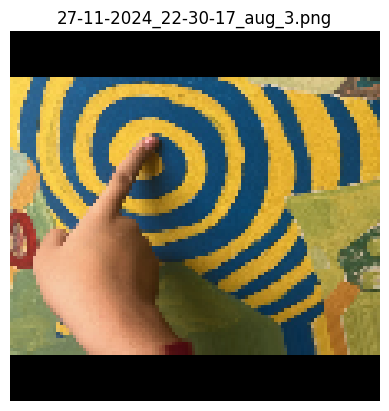

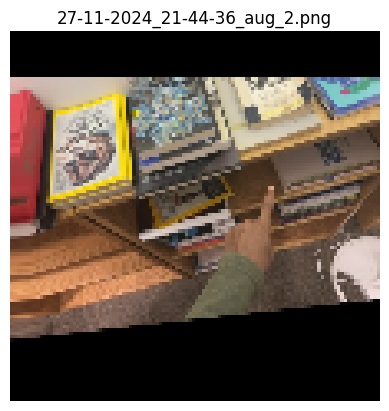

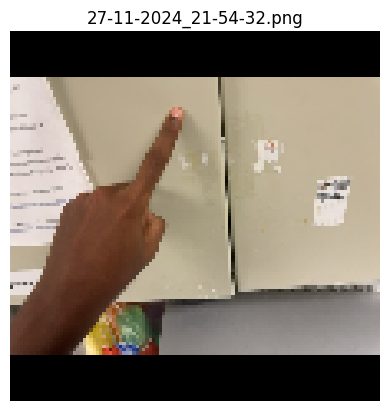

In [ ]:
# Plotting random images to show
NUM_IMAGES = 3
for i in range(NUM_IMAGES):
  image_path = np.random.choice(os.listdir('/content/datasets/processed_data'))
  image = cv2.imread(os.path.join('/content/datasets/processed_data', image_path))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.axis('off')
  plt.title(image_path)
  plt.show()

In [ ]:
# Download labels
labels_url = 'https://drive.google.com/uc?export=download&id=1GAMTt8AZYnecRxefPiR3_UO3DUDpvdTX'
gdown.download(labels_url, '/content/labels.json', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1GAMTt8AZYnecRxefPiR3_UO3DUDpvdTX
To: /content/labels.json
100%|██████████| 607k/607k [00:00<00:00, 8.91MB/s]


'/content/labels.json'

In [ ]:
with open('labels.json', 'r') as file:
    labels_data = json.load(file)

labels_dict = {item["file"]: (item["x"], item["y"]) for item in labels_data}

all_files = [f for f in os.listdir('/content/datasets/processed_data') if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

valid_files = [f for f in all_files if f.split('.')[0] in labels_dict]

# Remove invalid files from the directory
invalid_files = [f for f in all_files if f not in valid_files]
for invalid_file in invalid_files:
    os.remove(os.path.join('/content/datasets/processed_data', invalid_file))
    all_files.remove(invalid_file)
    print(f"Removed file without label: {invalid_file}")

Removed file without label: 28-11-2024_21-41-02.png
Removed file without label: 28-11-2024_21-31-26.png
Removed file without label: 27-11-2024_21-44-49(1)_aug_4.png
Removed file without label: 28-11-2024_21-42-16.png
Removed file without label: 28-11-2024_21-32-32.png
Removed file without label: 28-11-2024_21-32-50.png
Removed file without label: 28-11-2024_21-38-22.png
Removed file without label: 27-11-2024_22-29-02_aug_0.png
Removed file without label: 28-11-2024_21-29-30.png
Removed file without label: 28-11-2024_21-31-16.png
Removed file without label: 28-11-2024_21-29-28.png
Removed file without label: 28-11-2024_21-41-37.png
Removed file without label: 28-11-2024_21-31-53.png
Removed file without label: 28-11-2024_21-37-42.png
Removed file without label: 28-11-2024_21-40-56.png
Removed file without label: 28-11-2024_21-37-39.png
Removed file without label: 27-11-2024_21-44-54_aug_2.png
Removed file without label: 28-11-2024_21-32-12.png
Removed file without label: 28-11-2024_21-3

In [ ]:
train_labels = []
val_labels = []


def extract_label_from_filename(filename):
    # Remove file extension and split by dash
    base_name = filename.split('.')[0]
    if base_name in labels_dict:
      x = labels_dict[base_name][0]
      y = labels_dict[base_name][1]
      if x == "" or y == "":
          raise ValueError(f"Missing x or y for file: {base_name}")
      return (float(x), float(y))
    else:
      raise ValueError(f"Missing label for file: {base_name}")

# Split the files into train, validation, and test sets
train_split = 0.7
val_split = 0.2
test_split = 1 - train_split - val_split

train_files, test_files = train_test_split(all_files, test_size=test_split, random_state=52)
val_files, test_files = train_test_split(test_files, test_size=test_split, random_state=52)

# Generate labels (corresponding fingertip positions)
train_labels = [extract_label_from_filename(f) for f in train_files]
val_labels = [extract_label_from_filename(f) for f in val_files]
test_labels = [extract_label_from_filename(f) for f in test_files]

In [ ]:
# Using a custom generator for our keypoint data
class KeypointDataGenerator(Sequence):
    def __init__(self, image_paths, labels, batch_size, target_size, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_paths))

    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def denormalize_coords(self, denorm_x, denorm_y):
        return denorm_x * self.target_size[0], denorm_y * self.target_size[1]

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_labels = [self.labels[i] for i in batch_indexes]
        images = np.zeros((self.batch_size, *self.target_size, 3))
        keypoints = np.zeros((self.batch_size, 2)) # 2 coordinates for the fingertip

        for i, image_path in enumerate(batch_image_paths):
            image_path = os.path.join('/content/datasets/processed_data', image_path)
            image = cv2.imread(image_path)
            if image is None:
                raise ValueError(f"Failed to load image: {image_path}")
            images[i] = image / 255.0 # Normalize image to [0, 1]
            keypoints[i] = batch_labels[i]
        return images, keypoints


In [ ]:
train_generator = KeypointDataGenerator(
    image_paths=train_files,
    labels=train_labels,
    batch_size=16,
    target_size=(112, 112)
)

val_generator = KeypointDataGenerator(
    image_paths=val_files,
    labels=val_labels,
    batch_size=8,
    target_size=(112, 112)
)

test_generator = KeypointDataGenerator(
    image_paths=test_files,
    labels=test_labels,
    batch_size=2,
    target_size=(112, 112)
)

In [ ]:
print("Number of train images:", len(train_files))
print("Number of val images:", len(val_files))
print("Number of test images:", len(test_files))

print("First 5 train files:", train_files[:5])
print("First 5 val files:", val_files[:5])
print("First 5 test files:", test_files[:5])
print("First 5 train labels:", train_labels[:5])
print("First 5 val labels:", val_labels[:5])
print("First 5 test labels:", test_labels[:5])

Number of train images: 5359
Number of val images: 536
Number of test images: 60
First 5 train files: ['27-11-2024_21-52-46_aug_2.png', '64_aug_3.png', '27-11-2024_21-50-59_aug_3.png', '207_aug_2.png', '27-11-2024_21-51-22.png']
First 5 val files: ['27-11-2024_21-45-01.png', '27-11-2024_21-54-27_aug_3.png', '27-11-2024_22-30-33.png', '28-11-2024_21-30-46_aug_4.png', '268_aug_0.png']
First 5 test files: ['28-11-2024_21-28-45_aug_4.png', '27-11-2024_21-45-43_aug_1.png', '108_aug_3.png', '105_aug_4.png', '27-11-2024_21-55-59.png']
First 5 train labels: [(0.71875, 0.79375), (0.351562, 0.25), (0.523438, 0.460417), (0.060937, 0.585417), (0.539062, 0.449064)]
First 5 val labels: [(0.546875, 0.284823), (0.8875, 0.020833), (0.400694, 0.512963), (0.017188, 0.38125), (0.634375, 0.725)]
First 5 test labels: [(0.689063, 0.883333), (0.520312, 0.35), (0.507812, 0.729167), (0.617188, 0.766667), (0.184375, 0.534304)]


## Step 2: Training the Model

In [ ]:
def loss_function(y_true, y_pred):
    # Compute the squared difference between true and predicted coordinates
    square_diff = tf.math.squared_difference(y_true, y_pred)

    # Sum squared differences across coordinates (x and y)
    coordinate_loss = tf.reduce_sum(square_diff, axis=-1)

    # Compute the mean loss across the batch
    coordinate_loss = tf.reduce_mean(coordinate_loss)

    return coordinate_loss

In [ ]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='leaky_relu',
                  kernel_regularizer=tf.keras.regularizers.L2(0.001),
                  input_shape=(112, 112, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(32, (3, 3), activation='leaky_relu',
                  kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='leaky_relu',
                  kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalMaxPooling2D(),

    layers.Dense(512, kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.LeakyReLU(),
    layers.Dense(2, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
adam = tf.keras.optimizers.Adam(
    learning_rate=1e-3,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-10,
    decay=0.0
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-8
)
model.compile(optimizer=adam, loss=loss_function, metrics=['mse'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 110, 110, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 110, 110, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 55, 55, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 55, 55, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 53, 53, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 53, 53, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,386 (235.88 KB)

 Trainable params: 59,138 (231.01 KB)

 Non-trainable params: 1,248 (4.88 KB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[lr_scheduler]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


334/334 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 0.3534 - mse: 0.0891 - val_loss: 0.2820 - val_mse: 0.0656 - learning_rate: 0.0010
Epoch 2/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.2679 - mse: 0.0629 - val_loss: 0.2013 - val_mse: 0.0426 - learning_rate: 0.0010
Epoch 3/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.2047 - mse: 0.0485 - val_loss: 0.1733 - val_mse: 0.0444 - learning_rate: 0.0010
Epoch 4/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.1650 - mse: 0.0436 - val_loss: 0.1392 - val_mse: 0.0394 - learning_rate: 0.0010
Epoch 5/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.1382 - mse: 0.0412 - val_loss: 0.1259 - val_mse: 0.0409 - learning_rate: 0.0010
Epoch 6/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1206 - mse: 0.0397 - val_loss: 0.1275 - val_mse: 0.0465 - learning_rate: 0.0010
Epoch 7/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.1084 - mse: 0.0379 - val_loss: 0.0975 - val_mse: 0.0350 - learning_rate: 0.0010
Epoch 8

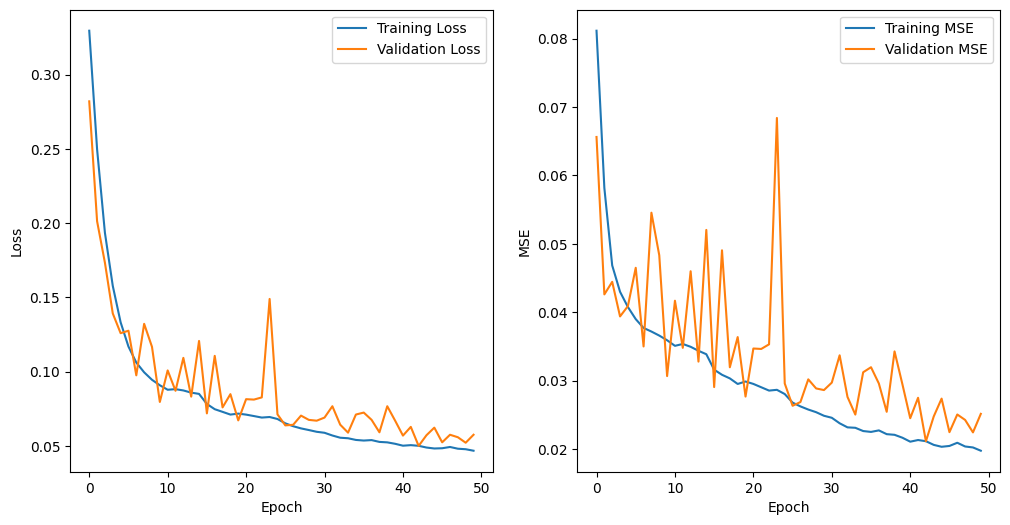

In [ ]:
# Plot the loss and mse
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


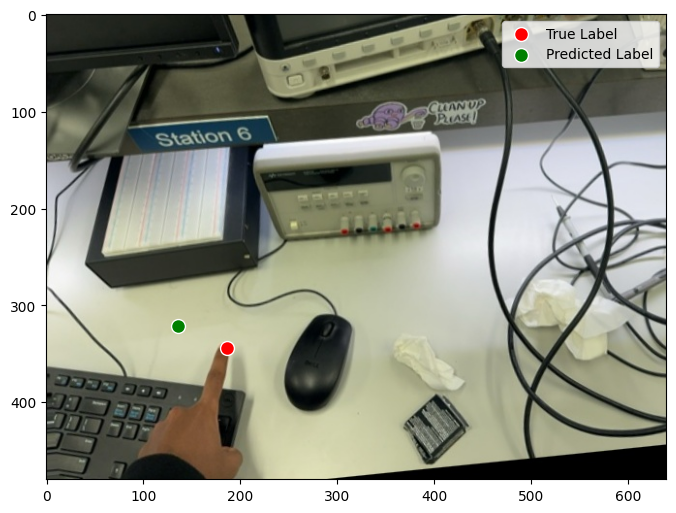

In [ ]:
# Predict and visualize
random_index = np.random.randint(0, len(test_files))
test_image_path = os.path.join('/content/datasets/extracted_data', test_files[random_index].split('.')[0] + '.jpg')
if not os.path.exists(test_image_path):
    test_image_path = os.path.join('/content/datasets/extracted_data', test_files[random_index])
if not os.path.exists(test_image_path):
    test_image_path = os.path.join('/content/datasets/extracted_data', test_files[random_index].split('.')[0] + '.jpeg')
if not os.path.exists(test_image_path):
    test_image_path = os.path.join('/content/datasets/extracted_data', test_files[random_index])
true_label = test_labels[random_index]

def visualize_prediction(model, image_path, true_keypoint):
    image = cv2.imread(image_path)

    height, width, _ = image.shape
    true_label = np.array(true_keypoint)
    true_label = true_label * np.array([width, height])
    preprocessed_image = cv2.imread(image_path)
    preprocessed_image = cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB)
    preprocessed_image = cv2.resize(preprocessed_image, (112, 112))
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    preprocessed_image = preprocessed_image / 255.0
    predicted_label = model.predict(preprocessed_image)
    predicted_label = predicted_label[0]
    predicted_label = predicted_label * np.array([width, height])

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.scatter(true_label[0], true_label[1], color='red', label='True Label', s=100, edgecolors='white')
    plt.scatter(predicted_label[0], predicted_label[1], color='green', label='Predicted Label', s=100, edgecolors='white')
    plt.legend()
    plt.show()
visualize_prediction(model, test_image_path, true_label)

## Step 3: Finding Closest Color Name

In [ ]:
!curl 'https://api.color.pizza/v1/?list=wikipedia' > color_list.json

with open('color_list.json', 'r') as file:
    color_data = json.load(file)

color_list = color_data['colors']
name_to_rgb = {color['name']: color['rgb'] for color in color_list}

COLOR_MAP = {name: tuple(rgb.values()) for name, rgb in name_to_rgb.items()}

with open('color_list_rgb.json', 'w') as file:
    json.dump(COLOR_MAP, file)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  313k    0  313k    0     0   317k      0 --:--:-- --:--:-- --:--:--  317k


In [ ]:
def find_closest_color(avg_color):
    """Find the name of the closest color to the given average color."""
    min_distance = float('inf')
    closest_color = None
    for color_name, rgb in COLOR_MAP.items():
        distance = np.linalg.norm(np.array(avg_color) - np.array(rgb))
        if distance < min_distance:
            min_distance = distance
            closest_color = color_name
    return closest_color

## Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


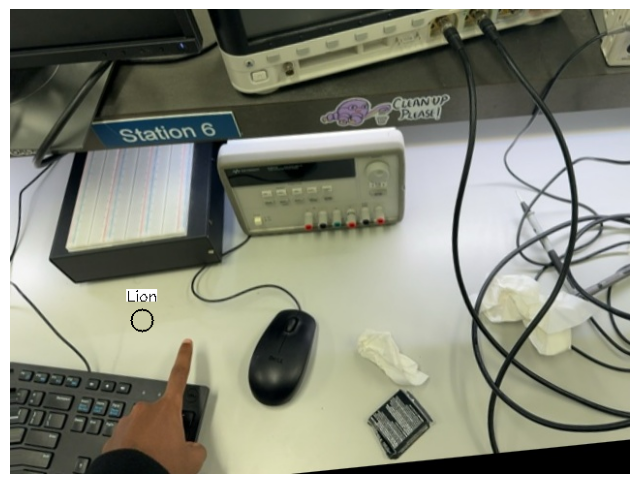

In [ ]:
# Find average color
random_index = np.random.randint(0, len(test_files))
test_image_path = os.path.join('/content/datasets/extracted_data', test_files[random_index].split('.')[0] + '.jpg')
if not os.path.exists(test_image_path):
    test_image_path = os.path.join('/content/datasets/extracted_data', test_files[random_index])
if not os.path.exists(test_image_path):
    test_image_path = os.path.join('/content/datasets/extracted_data', test_files[random_index].split('.')[0] + '.jpeg')
if not os.path.exists(test_image_path):
    test_image_path = os.path.join('/content/datasets/extracted_data', test_files[random_index])

CIRCLE_RADIUS = 10

def get_luminance(color):
    """Calculate the luminance of a color."""
    return 0.2126 * color[0] + 0.7152 * color[1] + 0.0722 * color[2]

def get_text_border_color(background_color):
    """Return black or white for optimal contrast with the background color."""
    luminance = get_luminance(background_color)
    if luminance > 128:
        return (0, 0, 0)  # Black for light backgrounds
    else:
        return (255, 255, 255)  # White for dark backgrounds

def calculate_average_color(image, y_min, y_max, x_min, x_max):
    """Calculate the average color in a region."""
    region = image[y_min:y_max, x_min:x_max]
    average_color = region.mean(axis=(0, 1)).astype(int)  # Calculate mean across height and width
    return average_color

def visualize_prediction(model, image_path, true_keypoint):
    image = cv2.imread(image_path)

    height, width, _ = image.shape
    preprocessed_image = cv2.imread(image_path)
    preprocessed_image = cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB)
    preprocessed_image = cv2.resize(preprocessed_image, (112, 112))
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    preprocessed_image = preprocessed_image / 255.0
    predicted_label = model.predict(preprocessed_image)
    predicted_label = predicted_label[0]
    predicted_label = predicted_label * np.array([width, height])

    keypoint_x, keypoint_y = int(predicted_label[0]), int(predicted_label[1])

    # Define the region to calculate the average color
    y_min = max(0, keypoint_y - CIRCLE_RADIUS)
    y_max = min(height, keypoint_y + CIRCLE_RADIUS)
    x_min = max(0, keypoint_x - CIRCLE_RADIUS)
    x_max = min(width, keypoint_x + CIRCLE_RADIUS)

    # Extract the region around the circle
    background_region = image[y_min:y_max, x_min:x_max]

    # Calculate the average color of the background region
    background_color = background_region.mean(axis=(0, 1)).astype(int)

    # Extract the region and calculate the average color
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    region = image[y_min:y_max, x_min:x_max]
    average_color = region.mean(axis=(0, 1)).astype(int)  # Calculate mean across height and width
    closest_color_name = find_closest_color(average_color)

    for y in range(keypoint_y - CIRCLE_RADIUS - 2, keypoint_y + CIRCLE_RADIUS + 3):
      for x in range(keypoint_x - CIRCLE_RADIUS - 2, keypoint_x + CIRCLE_RADIUS + 3):
          if 0 <= y < height and 0 <= x < width:  # Ensure within bounds
              dist = ((x - keypoint_x)**2 + (y - keypoint_y)**2)**0.5
              if CIRCLE_RADIUS < dist <= CIRCLE_RADIUS + 2:  # Border region
                  # Calculate the average color of the background pixel
                  background_color = image[y, x]
                  # Determine the optimal border color (either black or white)
                  border_color = get_text_border_color(background_color)
                  image[y, x] = border_color

    # Draw the circle with the average color
    cv2.circle(image, (keypoint_x, keypoint_y), CIRCLE_RADIUS, (int(average_color[0]), int(average_color[1]), int(average_color[2])), -1)

    # Add the closest color name centered above the circle
    font_scale = 0.5
    font_thickness = 1
    text_color = (0, 0, 0)

    # Calculate text size
    text_size = cv2.getTextSize(closest_color_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)[0]
    text_width, text_height = text_size

    # Adjust text position to center it
    text_x = keypoint_x - text_width // 2
    text_y = max(0, keypoint_y - CIRCLE_RADIUS - 10)

    # Ensure the text position stays within the image bounds
    text_x = max(0, min(text_x, width - text_width))

    text_position = (text_x, text_y)

    # Invert the pixel values behind the text
    for y in range(text_y - text_height, text_y + 1):  # Text height region
        for x in range(text_x, text_x + text_width):  # Text width region
            if 0 <= y < height and 0 <= x < width:  # Ensure within bounds
                image[y, x] = (255, 255, 255)

    # Draw the text
    cv2.putText(image, closest_color_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), font_thickness)

    # Draw the text
    cv2.putText(image, closest_color_name, text_position, cv2.FONT_HERSHEY_SIMPLEX, font_scale, text_color, font_thickness)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


visualize_prediction(model, test_image_path, true_label)

## Conversion to TFLite and Quantization

In [ ]:
# Save model to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpsieqei15'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 112, 112, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  132000722957968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723153872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723258352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723260816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723260992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723258704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723265568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723263632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723263984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723265392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13200072326504

In [ ]:
model_file = 'model'
!xxd -i {model_file}.tflite | sed "s/unsigned/const unsigned/g" | sed "s/model_model_int8_tflite/gmodel/g"> model.cc

In [ ]:
model_path = 'model.tflite'
model_size = os.path.getsize(model_path)
print(f"Model size: {model_size} bytes = " + str(round(model_size / (1024), 2)) + " KB")

Model size: 238984 bytes = 233.38 KB


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_data_get():
    for _ in range(100):
        random_index = np.random.randint(0, len(train_files))
        image_path = os.path.join('/content/datasets/extracted_data', train_files[random_index])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (112, 112))
        image = np.expand_dims(image, axis=0)
        image = image / 255.0
        yield [image.astype(np.float32)]


converter.representative_dataset = representative_data_get
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
tflite_model_quant = converter.convert()
!mkdir -p model
tflite_model_quant_file = pathlib.Path('model-int8.tflite')
tflite_model_quant_file.write_bytes(tflite_model_quant)

Saved artifact at '/tmp/tmphqqlt3_8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 112, 112, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  132000722957968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723153872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723258352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723260816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723260992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723258704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723265568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723263632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723263984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132000723265392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13200072326504

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


82904

In [ ]:
model_file = 'model-int8'
!xxd -i {model_file}.tflite | sed "s/unsigned/const unsigned/g" | sed "s/model_model_int8_tflite/gmodel/g"> quant_model.cc

In [ ]:
model_file = 'model-int8.tflite'
model_size = os.path.getsize(model_file)
print(f"Model size after quantization: {model_size} bytes = " + str(round(model_size / (1024), 2)) + " KB")

Model size after quantization: 82904 bytes = 80.96 KB
